# Graphical Exploration

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar

In [24]:
# load dataset
df = pd.read_csv('data/dataset.csv', delimiter=';')
df['Datetime'] = pd.to_datetime(df['Datetime'])

### Power of Powerplant

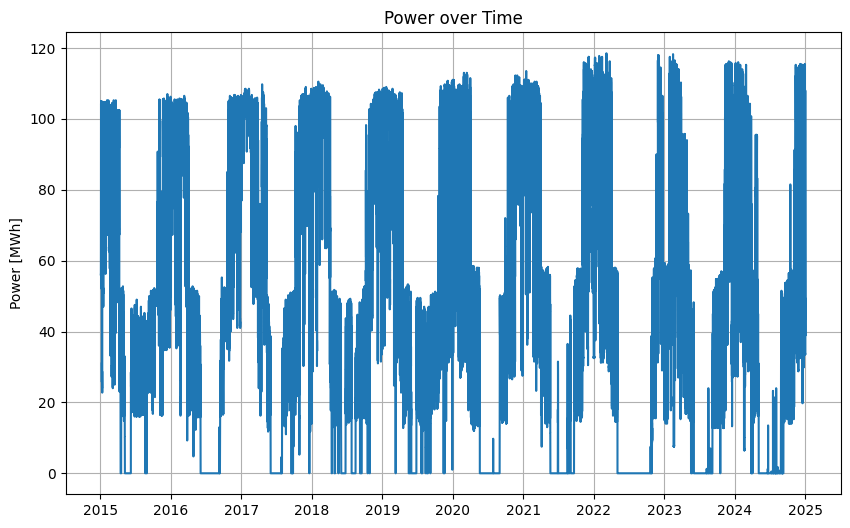

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['Datetime'], df['Power'])
plt.title("Power over Time")
plt.ylabel("Power [MWh]")
plt.grid()
plt.show()

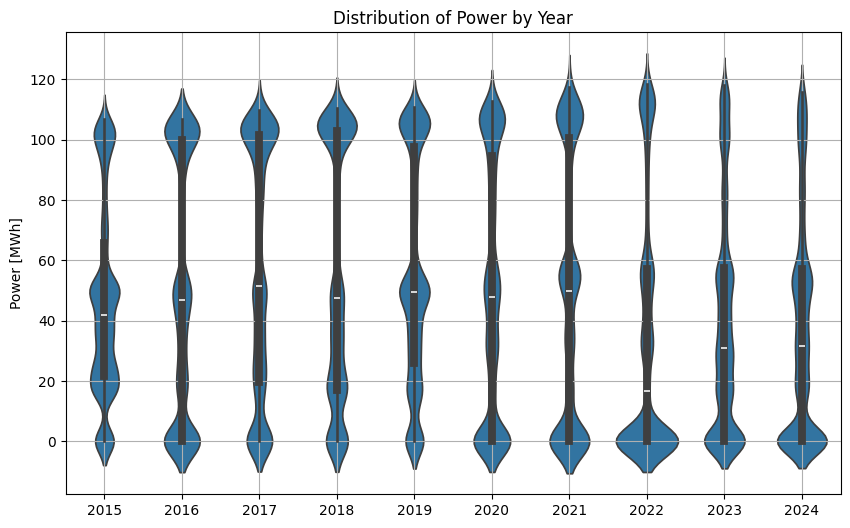

In [9]:
df['Year'] = df['Datetime'].dt.year

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Year', y='Power')
plt.title("Distribution of Power by Year")
plt.xlabel("")
plt.ylabel("Power [MWh]")
plt.grid()
plt.show()

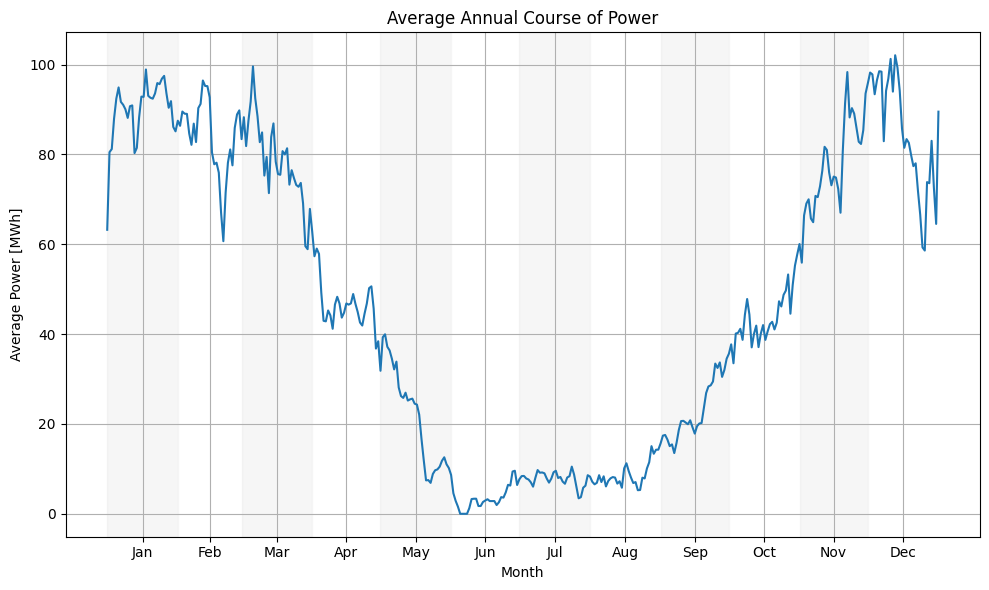

In [20]:

df['DayOfYear'] = df['Datetime'].dt.dayofyear
yearly_mean = df.groupby('DayOfYear')['Power'].mean()

month_days = [pd.Timestamp(2021, m, 1).day_of_year for m in range(1, 13)]
month_days.append(366)
month_names = list(calendar.month_abbr[1:])

plt.figure(figsize=(10,6))
plt.plot(yearly_mean, color='tab:blue', label='Mean Power')
for i in range(12):
    color = 'lightgray' if i % 2 == 0 else 'white'
    plt.axvspan(month_days[i], month_days[i+1], color=color, alpha=0.2)
plt.xticks([(month_days[i] + month_days[i+1]) / 2 for i in range(12)], month_names)
plt.title("Average Annual Course of Power")
plt.xlabel("Month")
plt.ylabel("Average Power [MWh]")
plt.grid()
plt.tight_layout()
plt.show()

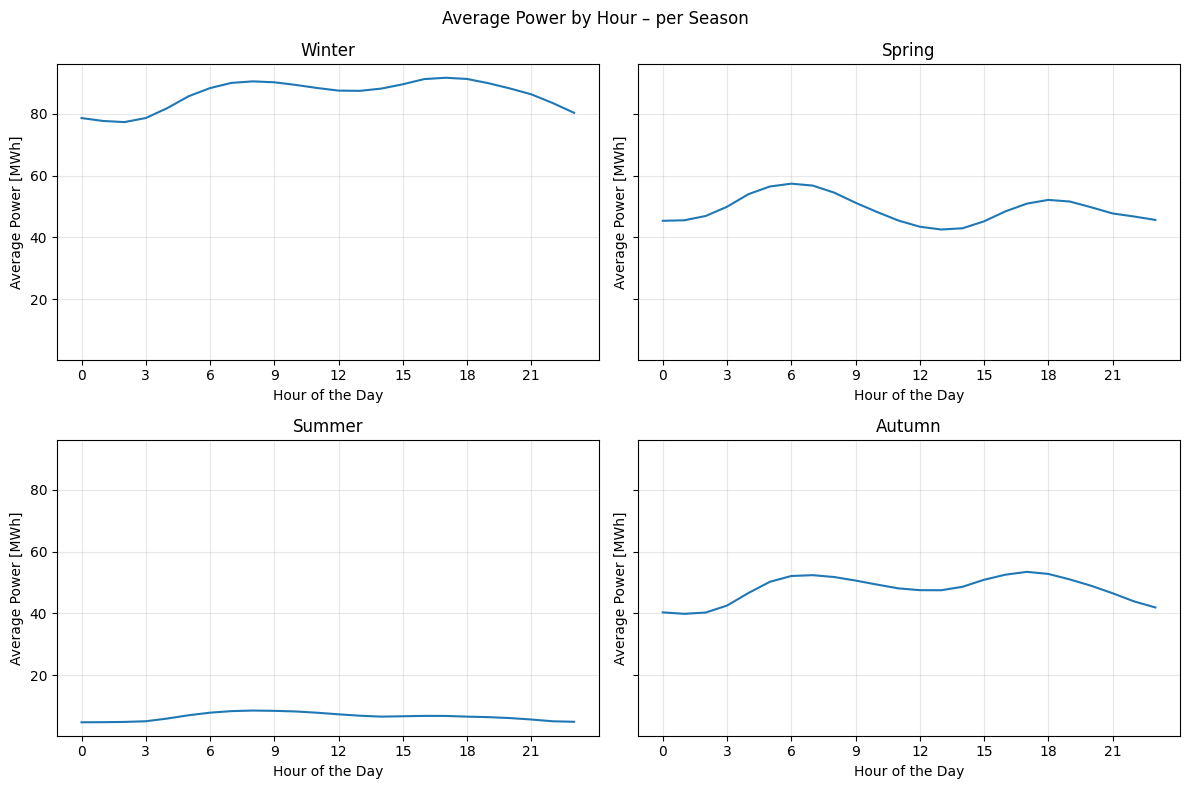

In [ ]:
df['Hour'] = df['Datetime'].dt.hour
month = df['Datetime'].dt.month
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df['Season'] = month.map(season_map)
order = ['Winter', 'Spring', 'Summer', 'Autumn']

grp = df.groupby(['Season','Hour'])['Power'].mean().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
for ax, season in zip(axes.flat, order):
    temp = grp[grp['Season'] == season]
    ax.plot(temp['Hour'], temp['Power'])
    ax.set_title(season)
    ax.set_xlabel("Hour of the Day")
    ax.set_ylabel("Average Power [MWh]")
    ax.set_xticks(range(0, 24, 3))
    ax.grid()

fig.suptitle("Average Power by Hour – per Season", y=0.98)
plt.tight_layout()
plt.show()

### Power Generation

/Users/leon/.pyenv/versions/pja/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/leon/.pyenv/versions/pja/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


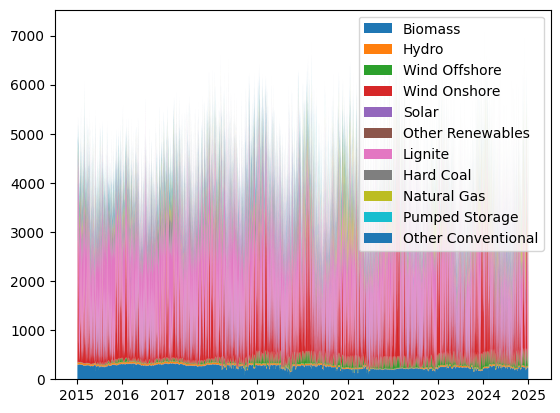

In [27]:
# Biomass Generation	Hydro Generation	Wind Offshore Generation	Wind Onshore Generation	Solar Generation	Other Renewables Generation	Lignite Generation	Hard Coal Generation	Natural Gas Generation	Pumped Storage Generation	Other Conventional Generation

plt.stackplot(df['Datetime'], df['Biomass Generation'], df['Hydro Generation'], df['Wind Offshore Generation'], df['Wind Onshore Generation'], df['Solar Generation'], df['Other Renewables Generation'], df['Lignite Generation'], df['Hard Coal Generation'], df['Natural Gas Generation'], df['Pumped Storage Generation'], df['Other Conventional Generation'])
plt.legend(['Biomass', 'Hydro', 'Wind Offshore', 'Wind Onshore', 'Solar', 'Other Renewables', 'Lignite', 'Hard Coal', 'Natural Gas', 'Pumped Storage', 'Other Conventional'])

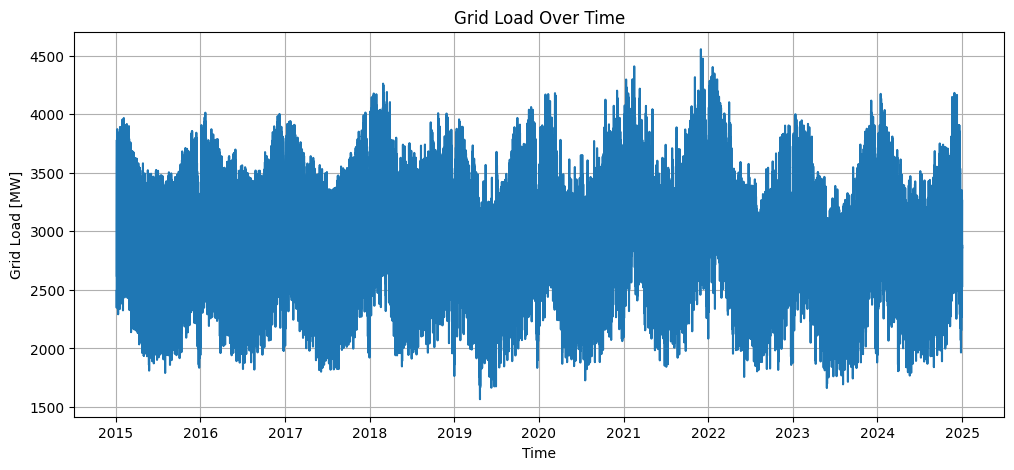

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['Datetime'], df['Grid Load'], color='tab:blue')
plt.title("Grid Load Over Time")
plt.xlabel("Time")
plt.ylabel("Grid Load [MW]")
plt.grid()
plt.show()

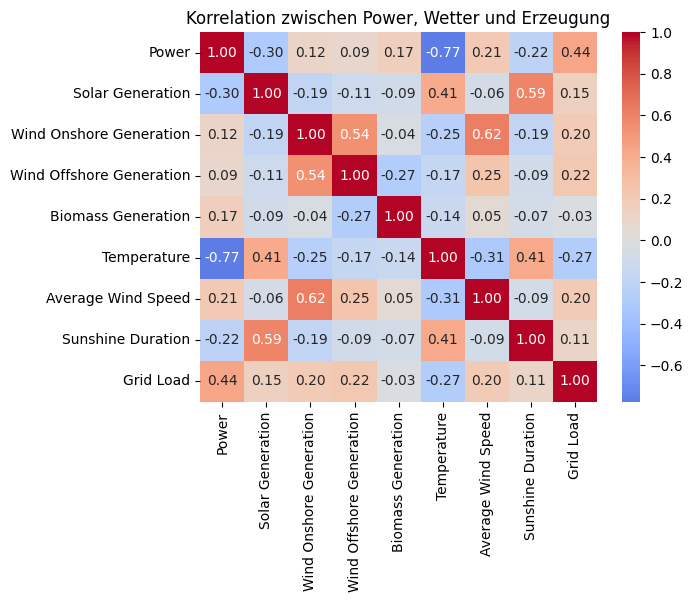

In [5]:
num_cols = ['Power','Solar Generation','Wind Onshore Generation','Wind Offshore Generation',
            'Biomass Generation','Temperature','Average Wind Speed','Sunshine Duration','Grid Load']

corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title("Korrelation zwischen Power, Wetter und Erzeugung")
plt.show()

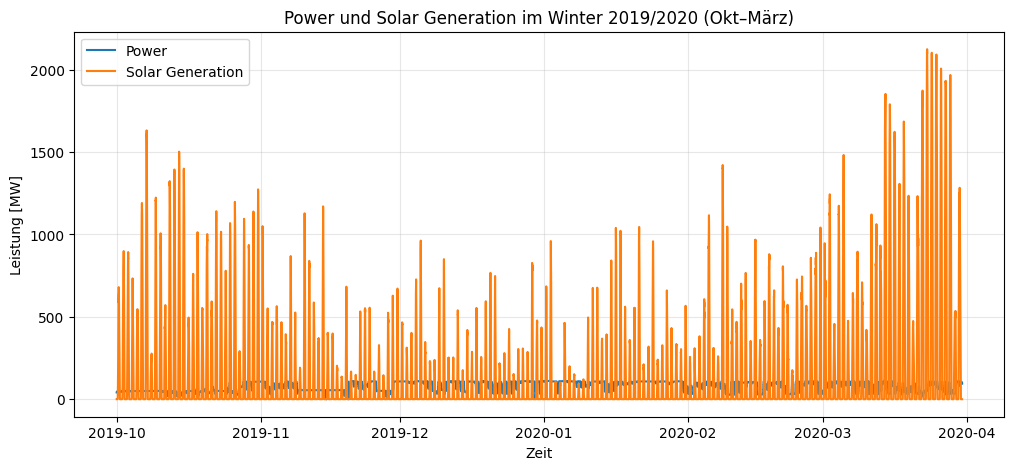

In [12]:
start = '2019-10-01'
end   = '2020-03-31'
temp_df = df[(df['Datetime'] >= start) & (df['Datetime'] <= end)]

# Plot
plt.figure(figsize=(12,5))
plt.plot(temp_df['Datetime'], temp_df['Power'], color='tab:blue', label='Power')
plt.plot(temp_df['Datetime'], temp_df['Solar Generation'], color='tab:orange', label='Solar Generation')
plt.title("Power und Solar Generation im Winter 2019/2020 (Okt–März)")
plt.xlabel("Zeit")
plt.ylabel("Leistung [MW]")
plt.legend()
plt.grid(alpha=0.3)
plt.show()